<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/01_Neural_Network_Regression_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Network in Tensorflow

Simplyfing Regression Problem : Predicting a numerical variable based on some combination of variables

In [39]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

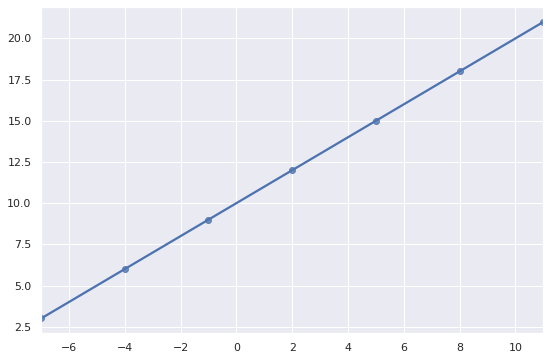

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Create Features
X = np.array(np.arange(-7 , 14 , 3))

# Create labels
y = np.array(np.arange(3,24,3))

#Plotting It
plt.figure(figsize = (9,6))
sns.regplot(x = X, y = y);

## Input and output shape

In [41]:
# Create a demo tensor housing price prediction problem

house_info = tf.constant(['bedroom' , 'bathroom' , 'garage'])
house_price = tf.constant([123456])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123456], dtype=int32)>)

In [42]:
# Recall that the individual element inside array is a scaler , therefore it is of 0 dim
X[0].shape , y[0].shape , X[0].ndim

((), (), 0)

In [43]:
# Converting Numpy array into tensor
X = tf.constant(X)
y = tf.constant(y)

X[0].shape , y[0].shape , X[0].ndim

(TensorShape([]), TensorShape([]), 0)

## Modelling In Tensorflow

1. Create a model - define input and output layer , as well as the hidden layers of a deep learning model
2. Compiling a model 
  - define the loss function (the function that tell our model how wrong it is
  - define the optimizer (tell our model how to improve our model)
  - evaluation metrics (performance of model)
3. Fitting a model

In [44]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.mae)

# Fit the model
model.fit(X , y , epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 248ms/step - loss: 10.8599 - mean_absolute_error: 10.8599
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 10.8099 - mean_absolute_error: 10.8099
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 10.7599 - mean_absolute_error: 10.7599
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 10.7099 - mean_absolute_error: 10.7099
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.6599 - mean_absolute_error: 10.6599


In [47]:
# Prediction using model - Here we will expect by predicting with X = 17 , expected y value is 27. 
# Given that the MAE is around 10 to 10 , our predicted value of 11.4 + 10 still fall out from our expected value
y_pred = model.predict([17])
y_pred

array([[11.441017]], dtype=float32)

## Tuning the model

We can tune our model to give better results by examining each of the steps taken in creating , compiling and fitting.

**1. Creating a model** - Add more layers , increase number of hidden units , change the activation function

**2. Compiling a model** - Change the optimization function , tune the learning rate of the optimization function

**3. Fitting a model** - More epochs (train longer) , give more data

In [50]:
# Tuning the model

#1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.mae)

#3. Fir the model
model.fit(X , y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 10.3356 - mean_absolute_error: 10.3356
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2856 - mean_absolute_error: 10.2856
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2356 - mean_absolute_error: 10.2356
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1856 - mean_absolute_error: 10.1856
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1356 - mean_absolute_error: 10.1356
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0856 - mean_absolute_error: 10.0856
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0356 - mean_absolute_error: 10.0356
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9856 - mean_absolute_error: 9.9856
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9356 - mean_absolute_error: 9.9356
Epoch 10/100

In [53]:
# Making prediction from model again - Tuned model improved closer to expected value of 27 when X = 17
model.predict([17])

array([[31.95852]], dtype=float32)